In [1]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functions import *
from functions_data_random import *

## Data

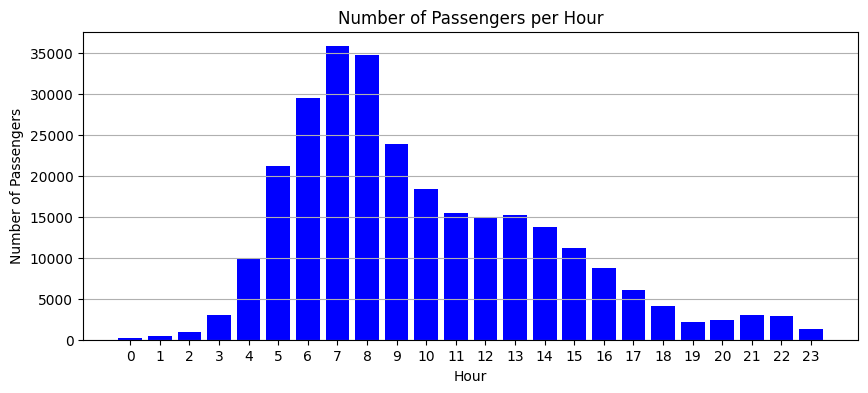

In [2]:
coordinates = coordinates(plot=False, num_entries=None)
distance_matrix = shortest_path(num_entries=None)
passengers= passenger_demand(num_entries=None)

In [17]:
commutes_per_hour = []

for hour in range(24):
    # Sum all non-zero entries in the array for the current hour
    number_passengers = np.sum(passengers[:, :, hour])
    commutes_per_hour.append(number_passengers)
commutes_per_hour

df = pd.DataFrame(commutes_per_hour)


,0
0,166.0
1,400.0
2,943.0
3,3021.0
4,9841.0
5,21209.0
6,29564.0
7,35834.0
8,34747.0
9,23914.0


In [19]:
# Step 1: Divide each entry by 4
divided_values = df[0] / 4

# Step 2: Repeat each divided number four times
repeated_values = divided_values.repeat(4).reset_index(drop=True)

# Step 3: Create a new dataframe with the resulting entries
new_df = pd.DataFrame({'values': repeated_values})

print(new_df)


    values
0    41.50
1    41.50
2    41.50
3    41.50
4   100.00
..     ...
91  723.25
92  334.50
93  334.50
94  334.50
95  334.50

[96 rows x 1 columns]


In [20]:
# determining the name of the file
file_name = 'od_demand.xlsx'

# saving the excel
new_df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [12]:
num_nodes = len(coordinates['GeoUID'])
num_vehicles = 20
num_timesteps = 24
epsilon = 10
battery, pi_plus, pi_minus, pi_out, alpha, E_req, gamma_max, gamma_min, gamma_0, tau, xi, rho_plus, rho_minus, rho_out, eta, R_bat, N_Cy, lambda_DoD = create_parameters(distance_matrix, num_vehicles, num_nodes, num_timesteps, print_values=True)

Battery capacities (B): [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Price to buy energy (pi_plus): [0.04813762 0.02397689 0.0247215  0.04622837 0.02841943 0.02374466
 0.02387739 0.03257904 0.0246821  0.02902485 0.04402791 0.03673126
 0.04832278 0.02997333 0.03841642 0.0390317  0.03913008 0.03753137
 0.04003608 0.03749228 0.02671172 0.04714178 0.04313242 0.03695967]
Price to sell energy (pi_minus): [0.01051345 0.02467298 0.029124   0.02221503 0.02833638 0.01473425
 0.02189161 0.02619403 0.02336379 0.02753795 0.02593054 0.02031254
 0.01387704 0.01124679 0.02405798 0.02785076 0.02515946 0.02019463
 0.01687407 0.02285466 0.02623985 0.01871317 0.01212508 0.01535988]
Price to sell energy (outage) (pi_out): [0.01734688 0.03180543 0.02493494 0.02908317 0.02867041 0.0176463
 0.01937259 0.02890816 0.03333333 0.02390972 0.03270885 0.02900141
 0.02391338 0.03412238 0.03057626 0.0290584  0.03350299 0.0331699
 0.03350494 0.02972552 0.03489911 

In [13]:
model = solveModel(epsilon, battery, passengers, pi_plus, pi_minus, pi_out, alpha, E_req, gamma_max, gamma_min, gamma_0, tau, xi, rho_plus, rho_minus, rho_out, eta, R_bat, N_Cy, lambda_DoD, num_nodes, num_vehicles, num_timesteps)

Solving with ɛ = 10
      4329.31 seconds required to write file
      4329.37 seconds required for presolve
Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-27
Read LP format model from file /var/folders/bs/tqpdfpm95n9c4cp994_d9lm00000gn/T/tmpqwewbza9.pyomo.lp
Reading time = 32.41 seconds
x1: 4985640 rows, 550716 columns, 39335584 nonzeros
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[rosetta2])

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4985640 rows, 550716 columns and 39335584 nonzeros
Model fingerprint: 0x6df6e7b5
Variable types: 32660 continuous, 518056 integer (506440 binary)
Coefficient statistics:
  Matrix range     [5e-02, 2e+01]
  Objective range  [5e-01, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+05]
Presolve removed 4964073 rows and 40386 columns 

# Results

In [ ]:
# Plot the results
plot_model_variables(model, num_vehicles)